# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

#### My Answer >>

In the healthcare industry (Where I work) we have so many information available from patient care to insurance claims and payments.  As it has lots of stakeholders in various lines of business, to various roles. In my area, there are 4 main user groups


#1 Insurance Businesspeople - This group is business leaders, not very technical but they have a good understanding of the nature of business as well as the visibility of current operation in general. . This group is interested in strategic level information if possible. They like more pictorial representations, graphs and dashboards. They do not interested in detail reports, and data points. They like to see trends , relationships at business entity level, topline and button line information. I recommend to provide high level view for this group during your presentation, if required we can have detail data points as appendix or drill-down reports. 


#2 Compliance Team : Their main focus is the legal, regulation and compliance of the business and business data.
This group is focus on more details around the data , table and chart. Not very interested in high level graphs and dashboards. They want to see full details of the data points that they are interested in as the compliance investigation can require as detail as data point end to end. 

#3 Operational Team  - This is a technical/business layer , not a very senior set of people but they have a detail understanding about the business. They are also very interested in operational data , and they are business savvy people with very detail knowledge about the business data. These people want to know as much as detail about their business processes, data points for operational matrixes etc. They would like to see data as detail operational dashboards, tables and graphs



#4 IT & infrastructure teams. – These people are very technical focus and not necessarily having full business understanding of the organization overall. They want to know how the IT system and infrastructure perform. They need real time information if possible – they are going to detail level reports, logs and infrastructure monitoring data. The message for these people have to be very specific to their systems, and technology 



# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
# load the file titanic.tsv file to a data fram

Titanic = pd.read_csv("titanic.tsv", sep="\t")
                      

In [4]:
# We will rename the target to survived as we do not use this data set for training puprose now.

Titanic.rename(columns={"target": "survived"}, inplace=True)
Titanic.head()

,gender,age,class,embarked,country,fare,sibsp,parch,survived
0,0.0,42.0,0.0,0,1.0,7.11,0.0,0.0,0
1,0.0,13.0,0.0,0,1.0,20.05,0.0,2.0,0
2,0.0,16.0,0.0,0,1.0,20.05,1.0,1.0,0
3,1.0,39.0,0.0,0,0.0,20.05,1.0,1.0,1
4,1.0,16.0,0.0,0,8.0,7.13,0.0,0.0,1


In [5]:
# Sumarize using Info()

Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    2206 non-null   float64
 1   age       2205 non-null   float64
 2   class     2206 non-null   float64
 3   embarked  2207 non-null   int64  
 4   country   2126 non-null   float64
 5   fare      2181 non-null   float64
 6   sibsp     2197 non-null   float64
 7   parch     2197 non-null   float64
 8   survived  2207 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 155.3 KB


In [6]:
# Sumarizing using 
Titanic.describe()


,gender,age,class,embarked,country,fare,sibsp,parch,survived
count,2206.000000,2205.000000,2206.000000,2207.000000,2126.000000,2181.000000,2197.000000,2197.000000,2207.000000
mean,0.221215,30.444444,1.980508,0.468509,2.539511,19.773290,0.297223,0.229404,0.322157
std,0.415159,12.151764,1.761282,0.873079,4.124542,43.402454,0.840384,0.694232,0.467409
min,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,2.000000,0.000000,0.000000,7.150600,0.000000,0.000000,0.000000
75%,0.000000,38.000000,4.000000,1.000000,3.000000,20.110600,0.000000,0.000000,1.000000
max,1.000000,74.000000,6.000000,3.000000,13.000000,512.060700,8.000000,9.000000,1.000000


#### Duplicate rows in the titanic data set:

In [7]:
# Check for duplicate rows in the Titanic dataset
duplicate_rows = Titanic.duplicated().sum()

# Display the number of duplicate rows
duplicate_rows


np.int64(612)

##### Accoring to above analysis there are 612 duplicat rows in the titanic data et. 

#### Null & Missing values in the Titanic Data Set :

There are missing values in Gender (1) , Age (2) , Class(1) , Country (81), Fare (26) , Sibsp (10), parch (10) . 

Ideally we can replace the Age as it may not effect the overall data set as well as the individual record.  Theoretically the fare also  can be replace with the mean value, but it has a high correlation with the Class. If we are to replace fare for a passenger we should use the mean fare of that class only.  The other fields like Country, parch and Class have an classification feature and its not correct to replace them with mean value but if it is absolutely required we can use the Mode of each column to replace the missing/null values 


In [8]:
#check missing values 
missing_values = Titanic.isnull().sum()
print("List of missing values each column: \n ")
missing_values


List of missing values each column: 
 


gender       1
age          2
class        1
embarked     0
country     81
fare        26
sibsp       10
parch       10
survived     0
dtype: int64

In [9]:
# Display the number of null values per column
null_values_per_column = Titanic.isnull().sum()

# Show the result
print("Number of nulll values in each colum :")
null_values_per_column


Number of nulll values in each colum :


gender       1
age          2
class        1
embarked     0
country     81
fare        26
sibsp       10
parch       10
survived     0
dtype: int64

#### Are there any duplicate values in a given column (when this would be inappropriate?)

My Answer ; In the Titanic data set , there are lots of duplicate values in each column , which is accurate as these are passenger attributes and NOT supposed to be unique values (e.g. ID , or Index or Key). If any of the column should have unique values , then the duplicate values will create issues. 

#### Mean , Median and Mode of the Titanic Data Set :

In [10]:
# Calculate mean, median, and mode for each numerical column

mean_values = Titanic.mean(numeric_only=True)
median_values = Titanic.median(numeric_only=True)
mode_values = Titanic.mode().iloc[0]  # Get the first mode value for each column

# Combine results into a DataFrame
summary_stats = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values
})
summary_stats


,Mean,Median,Mode
gender,0.221215,0.0000,0.0
age,30.444444,29.0000,22.0
class,1.980508,2.0000,0.0
embarked,0.468509,0.0000,0.0
country,2.539511,0.0000,0.0
fare,19.773290,7.1506,0.0
sibsp,0.297223,0.0000,0.0
parch,0.229404,0.0000,0.0
survived,0.322157,0.0000,0.0


#### Data Inconsistancy issues in the Titanic data set

In the data set the Fare is increasing from Class 0 to Class 2. That means, ideally the Class 0 maximum fare must be lower than Class 1 minimum fare.  However, I found that the maximum fare paid by a Class 0 passenger is $69, which is closer to the mean value of the Class 2 fare paid by passengers.  This can’t be practical and I think these are data inconsistency issues

In [11]:
# Calculate the maximum fare paid by a passenger in Class 0
max_fare_class_0 = Titanic[Titanic["class"] == 0]["fare"].max()

# Display the result
max_fare_class_0

np.float64(69.11)

In [12]:
# Calculate the mean fare for Class = 2
mean_fare_class_2 = Titanic[Titanic["class"] == 2]["fare"].mean()

# Display the result
mean_fare_class_2


np.float64(89.01734353312304)

#### Encoding Categorical Values 

The country code is a categorical column, and we can encode it as one-hot-key. 

In [13]:
# Perform one-hot encoding on the "country" column
titanic_encoded = pd.get_dummies(Titanic, columns=["country"], prefix="country")

# Fill NaN values with 0 before converting to int
titanic_encoded = titanic_encoded.fillna(0).astype(int)
titanic_encoded

,gender,age,class,embarked,fare,sibsp,parch,survived,country_0.0,country_1.0,...,country_4.0,country_5.0,country_6.0,country_7.0,country_8.0,country_9.0,country_10.0,country_11.0,country_12.0,country_13.0
0,0,42,0,0,7,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,13,0,0,20,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,16,0,0,20,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,39,0,0,20,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,16,0,0,7,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,0,41,6,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2203,0,40,4,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2204,0,32,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2205,0,20,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

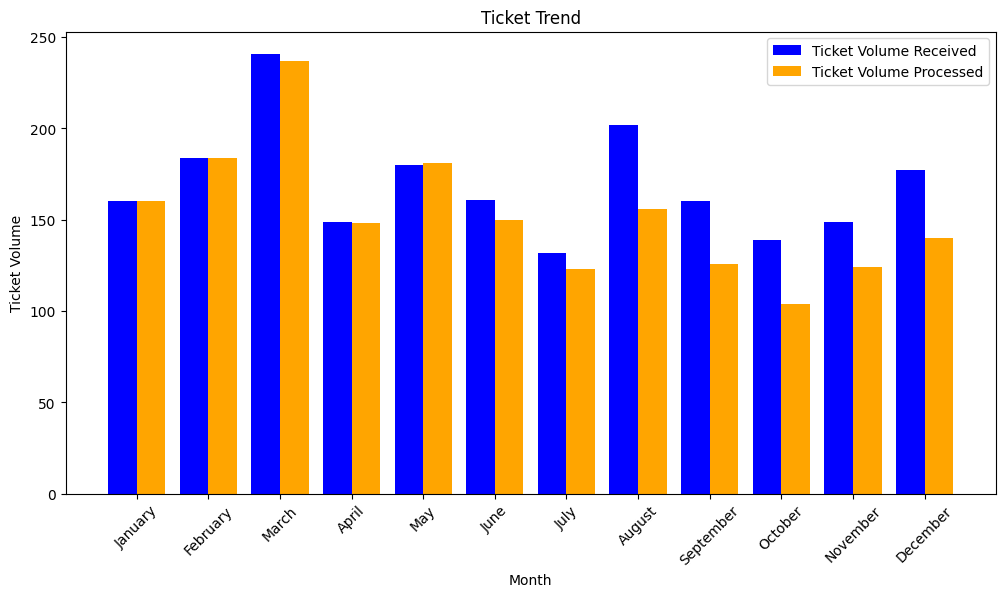

In [15]:
# I've used data points as close as possible from the book 

import matplotlib.pyplot as plt
import numpy as np

months = ["January", "February", "March", "April", "May", "June", "July", "August", 
          "September", "October", "November", "December"]
ticket_received = [160, 184, 241, 149, 180, 161, 132, 202, 160, 139, 149, 177]
ticket_processed = [160, 184, 237, 148, 181, 150, 123, 156, 126, 104, 124, 140]

# Set bar width
bar_width = 0.4
x_indexes = np.arange(len(months))

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(x_indexes - bar_width/2, ticket_received, width=bar_width, label="Ticket Volume Received", color="blue")
plt.bar(x_indexes + bar_width/2, ticket_processed, width=bar_width, label="Ticket Volume Processed", color="orange")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Ticket Volume")
plt.title("Ticket Trend")
plt.xticks(ticks=x_indexes, labels=months, rotation=45)
plt.legend()

# Show the graph
plt.show()
